## Develop a prpgram to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers using california housing dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Fetch the dataset
from sklearn.datasets import fetch_california_housing

In [5]:
#Load the data
data=fetch_california_housing(as_frame=True)
housing=data.frame


In [7]:
#Display first 5 rows
print(housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [9]:
#Create histogram for numerical feature
numerical_features=housing.select_dtypes(include=[np.number]).columns
print(f"Numerical featured:{list(numerical_features)}")

Numerical featured:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [11]:
#Determine grid size of subplot
n_features=len(numerical_features)
n_col=3
n_rows=n_features//3+1

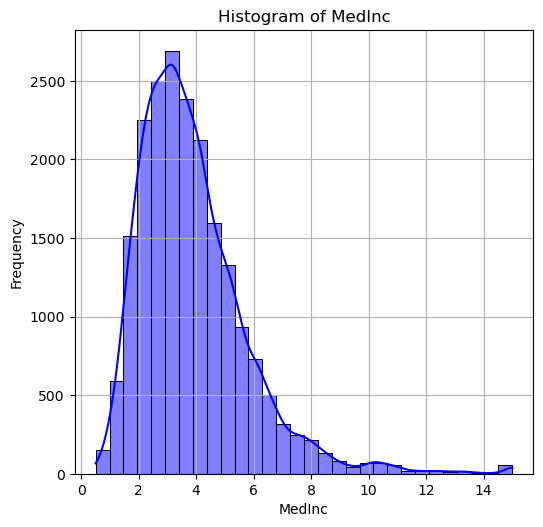

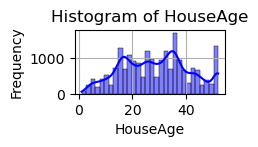

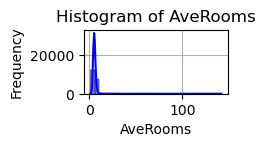

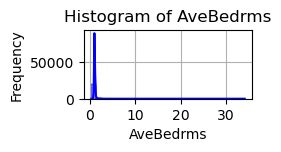

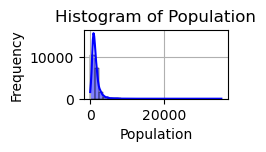

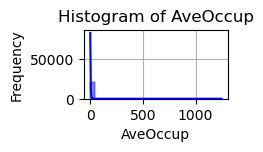

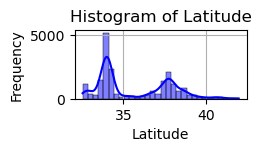

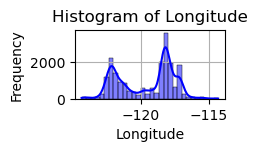

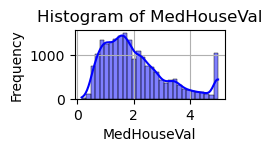

In [13]:
#Plot histogram
plt.figure(figsize=(15,5*n_rows))
for i,feature in enumerate(numerical_features):
    plt.subplot(n_rows,n_col,i+1)
    sns.histplot(housing[feature],kde=True,bins=30,color='blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


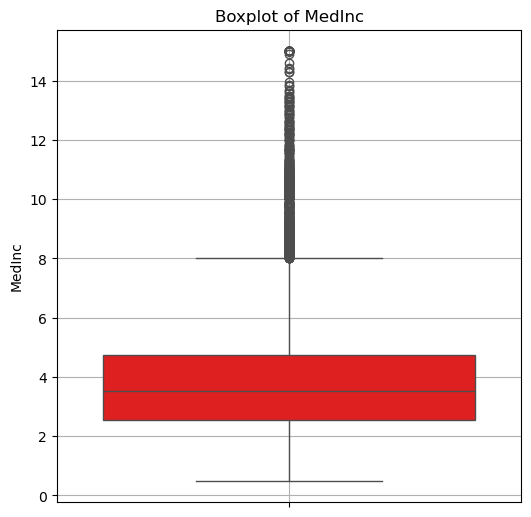

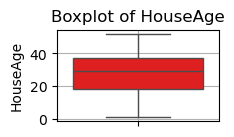

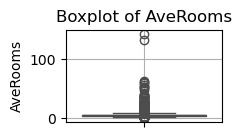

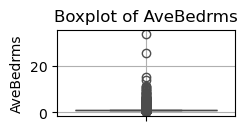

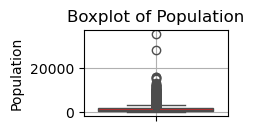

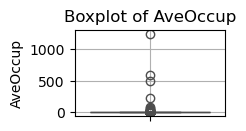

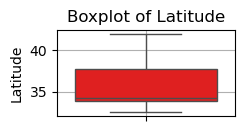

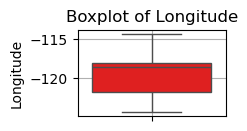

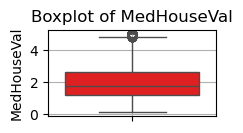

In [15]:
#Plot boxplot
plt.figure(figsize=(15,5*n_rows))
for i,feature in enumerate(numerical_features):
    plt.subplot(n_rows,n_col,i+1)
    sns.boxplot(housing[feature],color='red')
    plt.title(f"Boxplot of {feature}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
print("Outliers Detection")
outliers_summary={}
for feature in numerical_features:
    Q1=housing[feature].quantile(0.25)
    Q3=housing[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=housing[(housing[feature]<lower_bound)|(housing[feature]>upper_bound)]
    outliers_summary[feature]=len(outliers)
    print(f"{feature}:{len(outliers)} outliers")

Outliers Detection
MedInc:681 outliers
HouseAge:0 outliers
AveRooms:511 outliers
AveBedrms:1424 outliers
Population:1196 outliers
AveOccup:711 outliers
Latitude:0 outliers
Longitude:0 outliers
MedHouseVal:1071 outliers
